# Employee Exit Surveys

In this mini project we will analyze the employees of two institutes that resigned. We will try to identify the factors related to dissatisfaction leading to resignation in the case of shorter and longer employments. We will also try to identify differences and similarities of reasons of resignation between older and younger employees. The analysis will be based on data from two institutes of education in Australia.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [5]:
dete_survey.head()

ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  ...   Kept informed  Wellness programs  \
0  Permanent Full-time  ...               N                  N   
1  Permanent Full-time  ...               N                  N   
2  Permanent Full-time  ...               N                  N   
3  Permanent Full-time  ...               A                  N   
4  Permanent Full-time  ...               N                  A   

   Health & Safety  Gender          Age  Aboriginal  Torres Strait  South Sea  \
0                N    Male        56-60         NaN            NaN        NaN   
1                N    Male        56-60         NaN            NaN        NaN   
2                N    Male  61 or older         NaN            NaN        NaN   
3                A  Female        36-40         NaN            NaN        NaN   
4                M  Female  61 or older         NaN            NaN        NaN   

   Disability  NESB  
0         NaN   Yes  
1         NaN   NaN  
2         NaN   NaN  
3         NaN   NaN  
4         NaN   NaN  

[5 rows x 56 columns]

In [6]:
tafe_survey.head()

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

                                     ...                                     \
0                                    ...                                      
1                                    ...                                      
2                                    ...                                      
3                                    ...                                      
4                                    ...                                      

  Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?  \
0                                                Yes                                                            
1                                                Yes                                                            
2                                                Yes                                                            
3                                                Yes                                                            
4                                                Yes                                                            

  Workplace. Topic:Does your workplace promote and practice the principles of employment equity?  \
0                                                Yes                                               
1                                                Yes                                               
2                                                Yes                                               
3                                                Yes                                               
4                                                Yes  

In [7]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [8]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Inital look points to a problem of informative, but impractical column naming convention in the tafe dataset which will require additional clean up. Some columns in the dete data set are not related to dissatisfaction and some are composed of null values almost entirely, this makes them potential candidates to be dropped. Same holds true for the tafe data set. Some missing values in dete survey are masked as a "Not Stated" string. In the following we will replace the "Non Stated" strings with NaN and drop all the columns not relevant for the analysis.

In [9]:
# replacing not stated strings with NaN

dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

In [10]:
# removing redundant columns which are not related to dissatisfaction

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Next step is to standardize all of the column names between the two surveys so we can connect them later.

In [11]:
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.lower()
                               .str.strip()
                               .str.replace(" ", "_"))

In [12]:
rename_dict = {"Record ID" : "id", "CESSATION YEAR" : "cease_date", 
              "Reason for ceasing employment" : "separationtype", 
              "Gender. What is your Gender?" : "gender", 
              "CurrentAge. Current Age" : "age", 
               "Employment Type. Employment Type" : "employment_status",
              "Classification. Classification" : "position",
              "LengthofServiceOverall. Overall Length of Service at Institute (in years)" : "institute_service",
              "LengthofServiceCurrent. Length of Service at current workplace (in years)" : "role_service"}

tafe_survey_updated.rename(rename_dict, axis = 1, inplace=True)

In [13]:
dete_survey_updated.head()

id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     employment_status  ...   work_life_balance  workload  none_of_the_above  \
0  Permanent Full-time  ...               False     False               True   
1  Permanent Full-time  ...               False     False              False   
2  Permanent Full-time  ...               False     False               True   
3  Permanent Full-time  ...               False     False              False   
4  Permanent Full-time  ...                True     False              False   

   gender          age  aboriginal  torres_strait  south_sea  disability  nesb  
0    Male        56-60         NaN            NaN        NaN         NaN   Yes  
1    Male        56-60         NaN            NaN        NaN         NaN   NaN  
2    Male  61 or older         NaN            NaN        NaN         NaN   NaN  
3  Female        36-40         NaN            NaN        NaN         NaN   NaN  
4  Female  61 or older         NaN            NaN        NaN         NaN   NaN  

[5 rows x 35 columns]

In [14]:
tafe_survey_updated.head()

id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

      ...      Contributing Factors. Study Contributing Factors. Travel  \
0     ...                              NaN                          NaN   
1     ...                                -                       Travel   
2     ...                                -                            -   
3     ...                                -                       Travel   
4     ...                                -                            -   

  Contributing Factors. Other Contributing Factors. NONE  gender     age  \
0                         NaN                        NaN  Female  26  30   
1                           -                          -     NaN     NaN   
2                           -                       NONE     NaN     NaN   
3                           -                          -     NaN     NaN   
4                           -                          -    Male  41  45   

     employment_status                 position institute_service role_service  
0  Temporary Full-time      Administration (AO)               1-2          1-2  
1                  NaN                      NaN               NaN          NaN  
2                  NaN                      NaN               NaN          NaN  
3                  NaN                      NaN               NaN          NaN  
4  Permanent Full-time  Teacher (including LVT)               3-4          3-4  

[5 rows x 23 columns]

To continue we will filter the data to only take into account cases where the employee has resigned, excluding other types of employment end as retirement and termination.

In [15]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [17]:
dete_mask = ((dete_survey_updated["separationtype"] == "Resignation-Other reasons") |
             (dete_survey_updated["separationtype"] == "Resignation-Other employer") |
             (dete_survey_updated["separationtype"] == "Resignation-Move overseas/interstate"))
dete_resignations = dete_survey_updated[dete_mask].copy()

In [18]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"]

In [19]:
dete_resignations.shape

(311, 35)

In [20]:
tafe_resignations.shape

(340, 23)

It is important to check the data for logical inconsistencies, it is impossible for the year of employment and release to be after the current data, so we will remove all of these entries. Likewise dates before 1940s are dubious as people should be retired by the date of the study, so they will also be targeted in the cleaning process.

In [21]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [22]:
years_formatted = (dete_resignations["cease_date"]
                   .str.extract(r'[0-1][0-9]/(?P<Year>[0-2][0-9]{3})', 
                                expand=True).dropna())

In [23]:
dete_resignations.loc[years_formatted.index, "cease_date"] = years_formatted["Year"]

In [24]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)

In [25]:
dete_resignations["cease_date"].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [26]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [27]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

For a more complete analysis we would like to have data indicating years of service for each employee that resigned, we can find this data in tafe data set, but same information is missing in dete data set. Luckily, we can calculate it using the difference between the cease and start date.

In [28]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

Now we cleaned the data sets enough to be able to identify whether a resignation was due to dissatisfactio or something else. In the following we collect the data from all the columns related to potential dissatisfaction and build a single boolean column containg true if the resignation was beacause of the dissatisfaction, False for any other reason, and NaN if data is unavailable.

In [29]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [30]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [31]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

In [32]:
tafe_dissatisfaction = pd.DataFrame((tafe_resignations.loc[:, ["Contributing Factors. Dissatisfaction", 
                  "Contributing Factors. Job Dissatisfaction"]]
                  .copy()
                  .applymap(update_vals)
                  .any(axis=1, skipna=False)
))

In [33]:
tafe_resignations = tafe_resignations.copy()

In [34]:
tafe_resignations.loc[tafe_resignations.index, "dissatisfaction"] = tafe_dissatisfaction[0]

In [35]:
dete_dissatisfaction = dete_resignations[['dissatisfaction_with_the_department',
                                         'job_dissatisfaction',
                                         'physical_work_environment',
                                         'lack_of_recognition',
                                         'lack_of_job_security',
                                         'work_location',
                                         'employment_conditions',
                                         'work_life_balance',
                                         'workload']].any(axis=1, skipna=False)

In [36]:
dete_resignations["dissatisfaction"] = dete_dissatisfaction

In [37]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Now that we have years of service and dissatisfaction information neatly organized we can concentrate on combining the two data frames. We form a regular concatenation to connect the data frames, the columns that are important for rating satisfaction levels are compatible, while the remaining columns will be filled with NaN values during concatenation. We can remove those by dropping columns which have less than 500 non null values.

In [38]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [39]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [40]:
combined_updated = combined.dropna(thresh=500, axis=1)

The next part requires cleaning the years of service column and splitting it up into categories so we can easily perform aggregation later. We start of by standardizing all entries and converting them to numerical value. After that we apply a custom function to years of service column to create the following categories:
* 0-3 years: New
* 3-7 years: Experienced
* 7-10 years: Established
* 10 or more: Veteran

In [41]:
combined_updated["institute_service"].astype(str).value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
17.0                   6
12.0                   6
14.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
28.0                   2
25.0                   2
30.0                   2
36.0                   2
26.0                   2


In [42]:
combined_updated = combined_updated.copy()
combined_updated["institute_service"] = (combined_updated["institute_service"].astype(str)
                                      .str.replace("Less than 1 year", "0")
                                      .str.replace("More than 20 years", "20")
                                      .str.replace(r"-[0-9]", ".5") 
                                      .str.replace(r"-[0-9]{2}", ".5")
                                      .astype(float)
       )

In [43]:
def cat(val):
    if pd.isnull(val):
        return "NaN"
    elif (val >= 0) and (val < 3):
        return "New"
    elif (val >= 3) and (val < 7):
        return "Experienced"
    elif (val >= 7) and (val < 10):
        return "Established"
    elif val >= 10:
        return "Veteran"

In [44]:
combined_updated["service_cat"] = combined_updated["institute_service"].apply(cat)

Finally we can move on to the analysis part, first we fill in the missing values in the dissatisfaction column with the most frequent value. Afterwards we build a pivot table for each category in the years of service. We can observe that dissatisfaction amongst the people that resigned is highest for the established employees, followed by the veterans, while on the other hand it is lowest for the experienced and new employees.

In [45]:
combined_updated["dissatisfaction"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfaction, dtype: int64

In [46]:
combined_updated["dissatisfaction"].fillna(False, inplace=True)

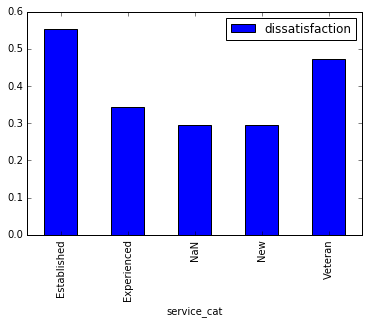

In [48]:
combined_updated.pivot_table(values="dissatisfaction", index="service_cat").plot(kind="bar")